In [7]:
%load_ext autoreload
%autoreload 2

# Autoreload is important, otherwise .py scripts won't be reloaded after changes.

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import data_loader

import common.columns as columns
from common.plots import plot_survived_by_category
from common.selectors import get_survived_counts

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
loader = data_loader.DataLoader()

train_set, test_set = loader.get_data()

In [9]:
train_set.shape, test_set.shape

((891, 12), (418, 11))

In [72]:
train_set.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
counts_by_gender = get_survived_counts(
  train_set,
  [
    (train_set[columns.SEX] == 'male'),
    (train_set[columns.SEX] == 'female')
  ],
  normalize=True
)

counts_by_class = get_survived_counts(
  train_set,
  [train_set[columns.P_CLASS] == x for x in range(1, 4)],
  normalize=True
)

unique_sib_sp_values = np.sort(train_set[columns.SIB_SP].unique())

counts_by_sib_sp = get_survived_counts(
  train_set,
  [train_set[columns.SIB_SP] == x for x in unique_sib_sp_values],
  normalize=True
)

unique_parch_values = np.sort(train_set[columns.PARCH].unique())

counts_by_parch = get_survived_counts(
  train_set,
  [train_set[columns.PARCH] == x for x in unique_parch_values],
  normalize=True
)

unique_embarked_values = train_set[columns.EMBARKED].dropna().unique()

counts_by_embarked = get_survived_counts(
  train_set,
  [train_set[columns.EMBARKED] == x for x in unique_embarked_values],
  normalize=True
)


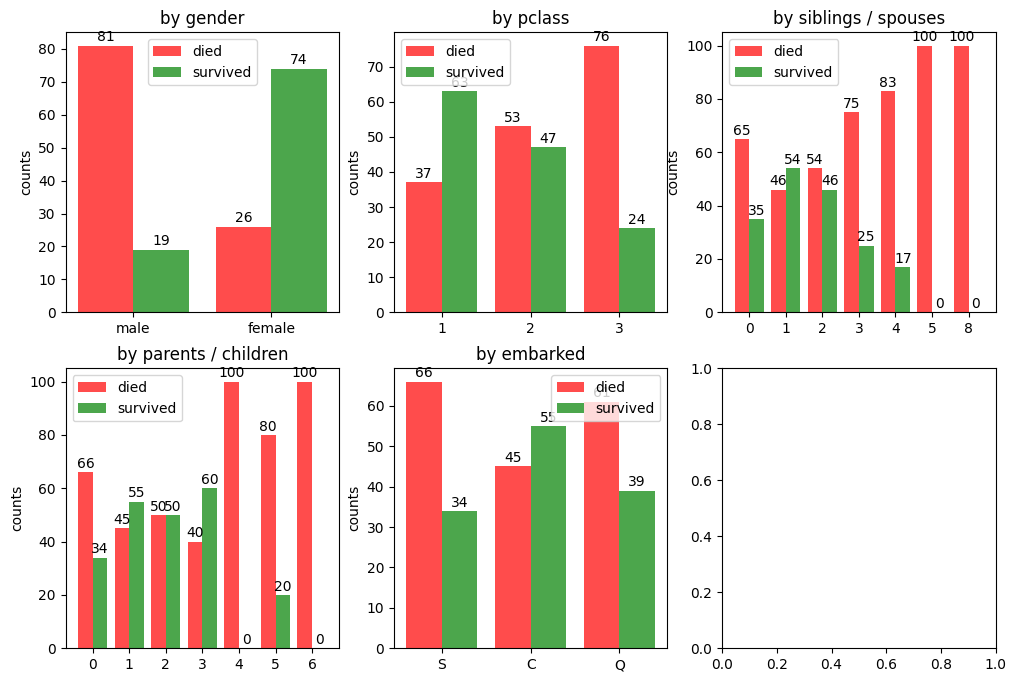

In [64]:
plot_survived_by_category([
  ('by gender', train_set[columns.SEX].unique(), counts_by_gender),
  ('by pclass', [1, 2, 3], counts_by_class),
  ('by siblings / spouses', unique_sib_sp_values, counts_by_sib_sp),
  ('by parents / children', unique_parch_values, counts_by_parch),
  ('by embarked', unique_embarked_values, counts_by_embarked)
])


## Conclusions
- 74% females survived, while only 19% of man did
- 75% of class 3 passengers died, while only 37% of 1 class passengers did
- people without spouses / siblings aboard are more likely to die than people with 1 or 2 spouses / siblings
- people without children / parents board are more likely to die than people with parents or children

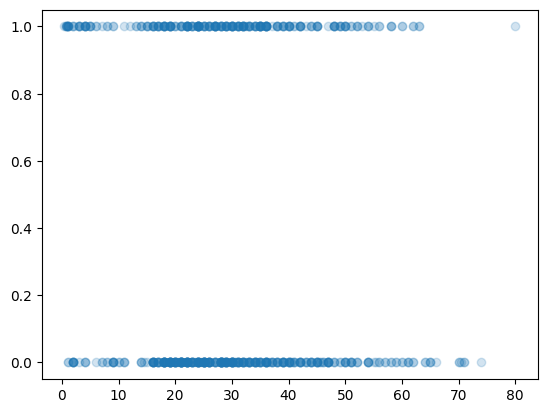

In [55]:
fig, ax = plt.subplots()

ax.scatter(train_set[columns.AGE], train_set[columns.SURVIVED], alpha=0.2)

In [39]:
age_missing = train_set[train_set[columns.AGE].isnull()]

pd.set_option('display.max_rows', 50)
age_missing[:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
